In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture


In [6]:
# Load an example wine dataset or replace with your own
df = pd.read_csv("../winequality.csv")

# Fill missing data with either random data or a category corresponding to "Unknown"
for column in df.columns:
    if df[column].isna().any() and pd.api.types.is_numeric_dtype(df[column]):
        df.loc[df[column].isna(), column] = [i for i in np.random.choice(range(round(df[column].min()), round(df[column]. max())), df[column].isna().sum())]
    elif df[column].isna().any() and (pd.api.types.is_object_dtype(df[column]) or pd.api.types.is_categorical_dtype(df[column])):
        df[column].fillna("Unknown")

# One-hot encode wine type
for column in df.columns:
    if pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
        one_hot = pd.get_dummies(df[column], prefix=column)
        df = df.drop(column, axis = 1)
        df = df.join(one_hot)

# Write a function for generating either a red or whit GMM

X = df.drop("quality", axis=1)
y = df["quality"]


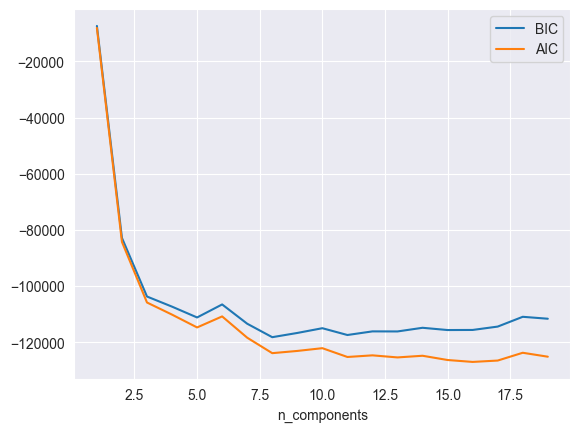

In [11]:
n_components = np.arange(1, 20)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [27]:
gmm = mixture.GaussianMixture(n_components=8, covariance_type='full', random_state=0)

In [28]:
gmm.fit(X)

GaussianMixture(n_components=8, random_state=0)

In [36]:
X_new, y_new = gmm.sample(4)

# Add synthetic data to the original DataFrame
synthetic_df = pd.DataFrame(X_new, columns=X.columns)
synthetic_df['quality'] = y_new

display(synthetic_df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white,quality
0,3.721445,0.582939,-0.010326,1.555253,0.075887,26.947266,53.874213,0.993806,3.699666,0.539718,9.286698,1.000033,0.000377,1
1,8.093061,0.477634,0.355724,7.870176,0.031673,11.419723,109.895139,0.994003,3.120883,0.480235,11.706584,-0.001078,1.001395,4
2,6.219560,0.263209,0.417840,9.212041,0.066369,32.308886,106.492285,0.996146,3.063505,0.338791,8.920324,-0.000031,0.999861,5
3,7.807813,0.275383,0.376185,2.039228,0.043966,24.910394,127.039945,0.994672,3.268489,0.644060,10.133601,-0.001120,1.000458,7
